In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import librosa
import librosa.display

import pandas as pd

from IPython.display import Audio

import os

In [75]:
sr = 16000

In [76]:
path_ds = '/home/edoardobucheli/TFSpeechCommands/train/audio/yes/'
#path_ds = '/home/edoardobucheli/sms-tools/sounds/'

In [51]:
names = [f for f in os.listdir(path_ds) if f.endswith('.wav')]
names.sort()

In [52]:
names_paths = [os.path.join(path_ds,f) for f in names]

In [53]:
def log10(x):
    numerator = tf.log(x)
    denominator = tf.log(tf.constant(10, dtype=numerator.dtype))
    return numerator / denominator

In [62]:
def preprocess_wave(file):
    twenty = tf.constant(20,dtype = tf.float32)
    
    x,sr = tf.audio.decode_wav(file, desired_channels = 1, desired_samples = 16000)
    x = tf.expand_dims(x,axis = 0)
    x = tf.squeeze(x,axis = -1)
    x = x/tf.reduce_max(tf.abs(x),axis = 1)
    X = tf.signal.stft(x,frame_length=512, frame_step = 256, fft_length = 1024)
    mX = twenty*log10(tf.abs(X))
    pX = tf.angle(X)
    return x,mX,pX

In [63]:
def load_and_preprocess_wav(path):
    file = tf.read_file(path)
    return preprocess_wave(file)

In [64]:
wave_path_ds = tf.data.Dataset.from_tensor_slices(names_paths)

In [65]:
wave_ds = wave_path_ds.map(load_and_preprocess_wav)
wave_ds = wave_ds.batch(16)

In [66]:
wave_ds

<DatasetV1Adapter shapes: ((?, 1, 16000), (?, 1, 61, 513), (?, 1, 61, 513)), types: (tf.float32, tf.float32, tf.float32)>

In [67]:
iterator = wave_ds.make_initializable_iterator()
next_element = iterator.get_next()

In [68]:
sess = tf.Session()

In [69]:
sess.run(iterator.initializer)

In [70]:
this_wave,this_mSpec,this_pSpec = sess.run(next_element)

In [71]:
this_wave.shape

(16, 1, 16000)

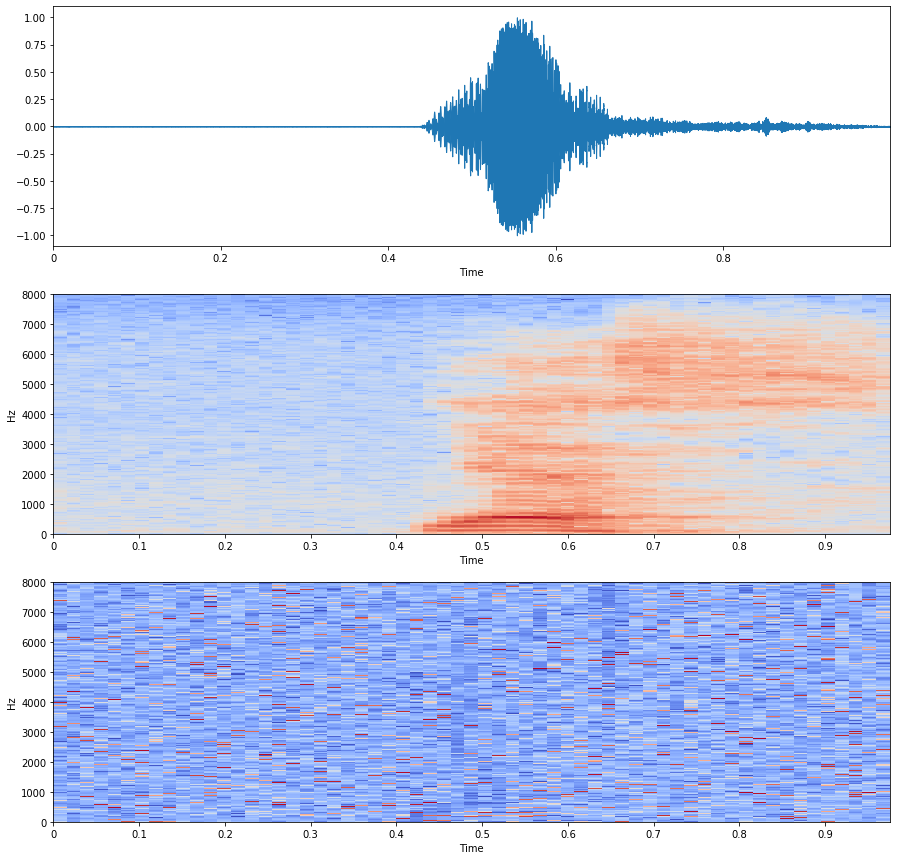

In [84]:
n = np.random.randint(0,16)
plt.figure(figsize = (15,15))
plt.subplot(3,1,1)
librosa.display.waveplot(this_wave[n].squeeze(0),sr = sr)
plt.subplot(3,1,2)
librosa.display.specshow(this_mSpec[n].squeeze(0).T,x_axis='time',y_axis='linear',sr=sr,hop_length=256)
plt.subplot(3,1,3)
librosa.display.specshow(np.diff(np.unwrap(this_pSpec[n].squeeze(0),axis=1),axis=1).T,x_axis='time',y_axis='linear',sr=sr,hop_length=256)

In [85]:
Audio(this_wave[n].squeeze(0),rate = sr)